In [1]:
! pip install pandas matplotlib

You should consider upgrading via the 'C:\Users\nikol\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [2]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
X = df.drop(columns='Diabetes_012')
y = df['Diabetes_012']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [5]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Number of Samples')

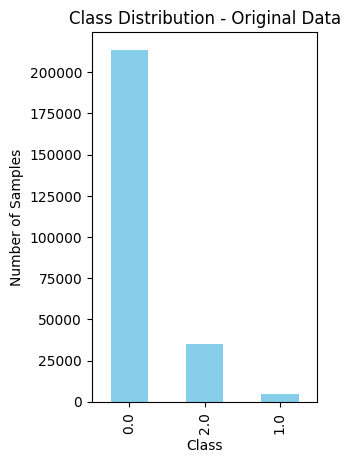

In [6]:
plt.subplot(1, 2, 1)
y.value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution - Original Data')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

In [7]:
y.value_counts(normalize=True) * 100

Diabetes_012
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: proportion, dtype: float64

Text(0, 0.5, 'Number of Samples')

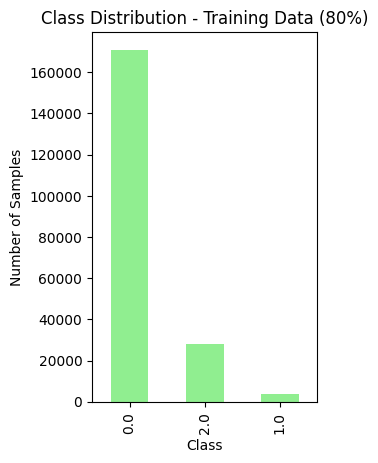

In [8]:
plt.subplot(1, 2, 2)
y_train.value_counts().plot(kind='bar', color='lightgreen')
plt.title('Class Distribution - Training Data (80%)')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

In [9]:
y_train.value_counts(normalize=True) * 100

Diabetes_012
0.0    84.240973
2.0    13.933400
1.0     1.825627
Name: proportion, dtype: float64

In [10]:
offline_df = pd.concat([X_train, y_train], axis=1)
online_df = pd.concat([X_test, y_test], axis=1)

In [11]:
offline_df.to_csv("offline.csv", index=False)
online_df.to_csv("online.csv", index=False)

In [12]:
# Offline Фаза

In [13]:
from pyspark.sql import SparkSession

In [14]:
spark = SparkSession.builder.appName("DiabetesClassification").master("local[*]").getOrCreate()

In [15]:
df_offline = spark.read.csv("offline.csv", header=True, inferSchema=True)
df_offline.show(5)

+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+------------+
|HighBP|HighChol|CholCheck| BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex| Age|Education|Income|Diabetes_012|
+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+------------+
|   1.0|     0.0|      1.0|25.0|   0.0|   0.0|                 0.0|         1.0|   1.0|    1.0|              0.0|          1.0|        0.0|    2.0|     0.0|     0.0|     0.0|1.0|10.0|      4.0|   4.0|         0.0|
|   0.0|     0.0|      1.0|37.0|   1.0|   0.0|                 0.0|         1.0|   1.0|    1.0|              0.0|          1.0|        0.0|    1

In [16]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler

In [17]:
def transform(data, input_cols):
    assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
    output = assembler.transform(data)
    
    scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
    scaledData = scaler.fit(output).transform(output)
    
    return scaledData
    

In [18]:
feature_columns = [col for col in df_offline.columns if col != 'Diabetes_012']
feature_columns

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [19]:
df_scaled = transform(df_offline, feature_columns)
df_scaled.show(5)

+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+------------+--------------------+--------------------+
|HighBP|HighChol|CholCheck| BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex| Age|Education|Income|Diabetes_012|            features|      scaledFeatures|
+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+------------+--------------------+--------------------+
|   1.0|     0.0|      1.0|25.0|   0.0|   0.0|                 0.0|         1.0|   1.0|    1.0|              0.0|          1.0|        0.0|    2.0|     0.0|     0.0|     0.0|1.0|10.0|      4.0|   4.0|         0.0|(21,[0,2,3,7,8,9,..

In [20]:
df_scaled.select("scaledFeatures").show(5, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------+
|scaledFeatures                                                                                                                                           |
+---------------------------------------------------------------------------------------------------------------------------------------------------------+
|(21,[0,2,3,7,8,9,11,13,17,18,19,20],[1.0,1.0,0.1511627906976744,1.0,1.0,1.0,1.0,0.25,1.0,0.75,0.6000000000000001,0.42857142857142855])                   |
|(21,[2,3,4,7,8,9,11,19,20],[1.0,0.29069767441860467,1.0,1.0,1.0,1.0,1.0,0.8,0.5714285714285714])                                                         |
|(21,[0,1,2,3,7,8,11,13,18,19,20],[1.0,1.0,1.0,0.26744186046511625,1.0,1.0,1.0,0.25,0.8333333333333333,0.8,0.2857142857142857])                           |
|(21,[2,3,7,11,13,15,17,18,19,20],[1.0,0.1744186046511628,1.0,1.

In [21]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [22]:
df_filtered = df_scaled.select("scaledFeatures", "Diabetes_012")

In [23]:
evaluator = MulticlassClassificationEvaluator(labelCol="Diabetes_012", predictionCol="prediction", metricName="f1")

In [24]:
lr = LogisticRegression(featuresCol="scaledFeatures", labelCol="Diabetes_012")
dt = DecisionTreeClassifier(featuresCol="scaledFeatures", labelCol="Diabetes_012")
rf = RandomForestClassifier(featuresCol="scaledFeatures", labelCol="Diabetes_012")

In [25]:
lr_param_grid = (ParamGridBuilder()
                 .addGrid(lr.regParam, [0.01, 0.1, 0.5])
                 .addGrid(lr.maxIter, [50, 100])
                 .build())

dt_param_grid = (ParamGridBuilder()
                 .addGrid(dt.maxDepth, [5, 10, 15])
                 .addGrid(dt.maxBins, [20, 40])
                 .build())

rf_param_grid = (ParamGridBuilder()
                 .addGrid(rf.numTrees, [10, 50])
                 .addGrid(rf.maxDepth, [5, 10])
                 .build())


In [26]:
cv_lr = CrossValidator(estimator=lr, estimatorParamMaps=lr_param_grid, evaluator=evaluator, numFolds=5)
cv_dt = CrossValidator(estimator=dt, estimatorParamMaps=dt_param_grid, evaluator=evaluator, numFolds=5)
cv_rf = CrossValidator(estimator=rf, estimatorParamMaps=rf_param_grid, evaluator=evaluator, numFolds=5)

In [27]:
cv_lr_model = cv_lr.fit(df_filtered)
cv_dt_model = cv_dt.fit(df_filtered)
cv_rf_model = cv_rf.fit(df_filtered)

In [28]:
f1_lr = evaluator.evaluate(cv_lr_model.bestModel.transform(df_filtered))
f1_dt = evaluator.evaluate(cv_dt_model.bestModel.transform(df_filtered))
f1_rf = evaluator.evaluate(cv_rf_model.bestModel.transform(df_filtered))

In [29]:
print(f"Logistic Regression F1: {f1_lr}")
print(f"Decision Tree F1: {f1_dt}")
print(f"Random Forest F1: {f1_rf}")

Logistic Regression F1: 0.8065274491471475
Decision Tree F1: 0.8189465738314347
Random Forest F1: 0.8076458247816091


In [30]:
cv_dt_model.bestModel.save("best-model")